# 1.Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# 2.Load the Dataset

In [2]:
csv_file = 'market_basket.csv'
df_binary = pd.read_csv(csv_file)

print("Dataset shape:", df_binary.shape)
df_binary.head(10)

Dataset shape: (790, 11)


,TransactionID,Milk,Bread,Butter,Eggs,Cheese,Chicken,Pasta,Tomato,Rice,Juice
0,1,1,0,0,0,1,0,1,1,1,0
1,2,0,1,0,0,0,0,0,0,1,1
2,3,1,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,1,0,1,0,1
4,5,0,1,0,0,0,1,1,0,0,0
5,6,0,0,0,1,1,0,0,1,0,0
6,7,1,0,0,1,1,0,1,0,0,0
7,8,1,1,1,0,0,0,0,0,0,1
8,9,0,0,0,1,0,0,1,1,0,1
9,10,1,0,0,0,1,0,0,0,1,1


# 3.Convert to Transaction Format and One-Hot Encoding

In [3]:
# Extract item columns (exclude TransactionID)
item_columns = [col for col in df_binary.columns if col != 'TransactionID']

# Create list of transactions (each is a list of items bought)
transactions = []
for _, row in df_binary.iterrows():
    transaction = [item for item in item_columns if row[item] == 1]
    transactions.append(transaction)

# Convert to one-hot encoded format using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("Encoded dataset shape:", df_encoded.shape)
df_encoded.head(10)

Encoded dataset shape: (790, 10)


,Bread,Butter,Cheese,Chicken,Eggs,Juice,Milk,Pasta,Rice,Tomato
0,False,False,True,False,False,False,True,True,True,True
1,True,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,True,False,True,True,False,False,True
4,True,False,False,True,False,False,False,True,False,False
5,False,False,True,False,True,False,False,False,False,True
6,False,False,True,False,True,False,True,True,False,False
7,True,True,False,False,False,True,True,False,False,False
8,False,False,False,False,True,True,False,True,False,True
9,False,False,True,False,False,True,True,False,True,False


# 4.Explore Most Frequent Items

Top 10 Most Frequent Items:
Juice      301
Milk       274
Pasta      262
Tomato     257
Bread      242
Rice       225
Chicken    220
Cheese     218
Butter     217
Eggs       203
dtype: int64


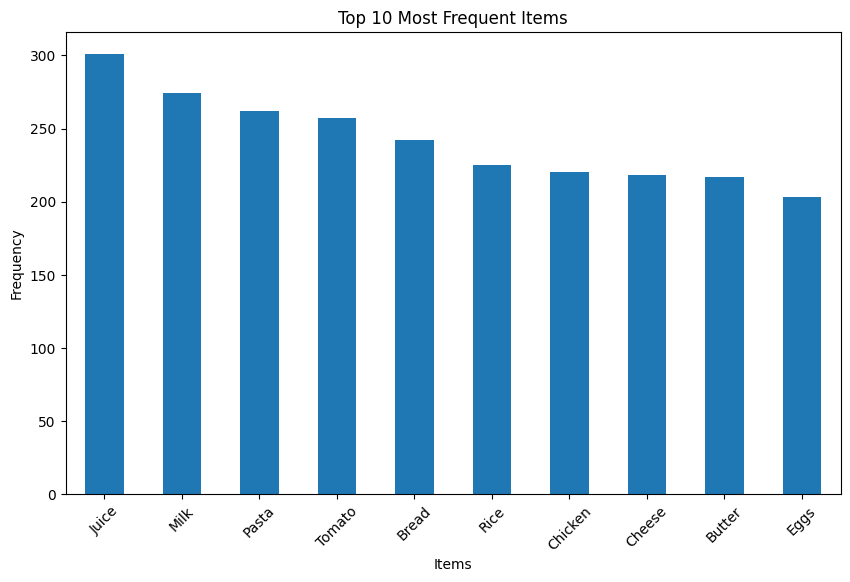

In [4]:
# Count frequency of each item
item_frequencies = df_encoded.sum().sort_values(ascending=False)

# Display top 10 most frequent items
print("Top 10 Most Frequent Items:")
print(item_frequencies.head(10))

# Plot
plt.figure(figsize=(10, 6))
item_frequencies.head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Items')
plt.ylabel('Frequency')
plt.xlabel('Items')
plt.xticks(rotation=45)
plt.show()

# 5.Run Apriori Algorithm to Find Frequent Itemsets

In [ ]:
min_support = 0.02

# Run Apriori
frequent_itemsets_apriori = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Add length of itemset
frequent_itemsets_apriori['length'] = frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x))

print(f"Found {len(frequent_itemsets_apriori)} frequent itemsets")
frequent_itemsets_apriori.sort_values('support', ascending=False).head(15)

Found 112 frequent itemsets


,support,itemsets,length
5,0.381013,(Juice),1
6,0.346835,(Milk),1
7,0.331646,(Pasta),1
9,0.325316,(Tomato),1
0,0.306329,(Bread),1
8,0.284810,(Rice),1
3,0.278481,(Chicken),1
2,0.275949,(Cheese),1
1,0.274684,(Butter),1
4,0.256962,(Eggs),1


# 6.Generate Association Rules

In [6]:
# Generate rules with minimum confidence
min_confidence = 0.3

rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=min_confidence)

# Add readable columns
rules_apriori['antecedents_str'] = rules_apriori['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_apriori['consequents_str'] = rules_apriori['consequents'].apply(lambda x: ', '.join(list(x)))

print(f"Found {len(rules_apriori)} association rules")
rules_apriori[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']] \
    .sort_values('lift', ascending=False).head(15)

Found 131 association rules


,antecedents_str,consequents_str,support,confidence,lift
61,"Juice, Rice",Bread,0.075949,0.714286,2.331759
105,"Cheese, Milk",Eggs,0.067089,0.582418,2.266551
104,"Eggs, Milk",Cheese,0.067089,0.609195,2.207635
82,"Butter, Pasta",Chicken,0.068354,0.600000,2.154545
124,"Juice, Milk",Tomato,0.088608,0.686275,2.109560
81,"Chicken, Pasta",Butter,0.068354,0.562500,2.047811
60,"Juice, Bread",Rice,0.075949,0.566038,1.987421
127,"Juice, Pasta",Tomato,0.075949,0.631579,1.941429
80,"Chicken, Butter",Pasta,0.068354,0.606742,1.829488
125,"Tomato, Milk",Juice,0.088608,0.686275,1.801186


# 7.Visualize Frequent Itemsets by Size

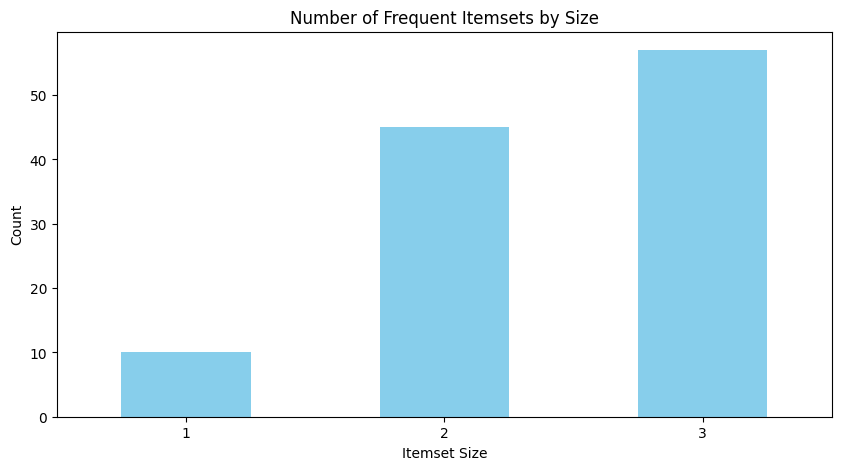

In [7]:
# Count itemsets by size
size_counts = frequent_itemsets_apriori['length'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
size_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Frequent Itemsets by Size')
plt.xlabel('Itemset Size')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 8.Heatmap of Support for 2-Itemsets

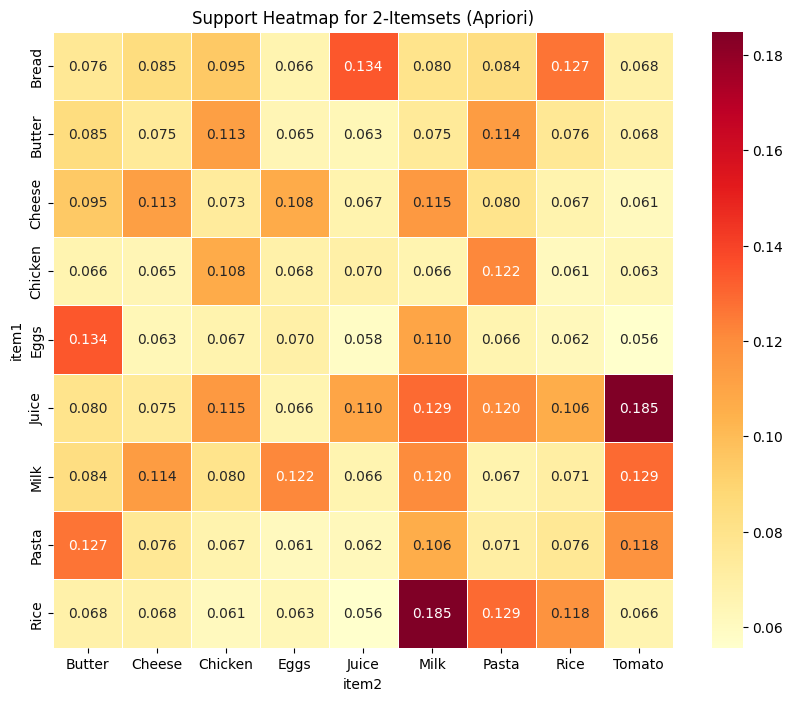

In [8]:
# Filter only 2-itemsets
pairs = frequent_itemsets_apriori[frequent_itemsets_apriori['length'] == 2].copy()

if len(pairs) > 0:
    # Extract individual items
    pairs['item1'] = pairs['itemsets'].apply(lambda x: sorted(x)[0])
    pairs['item2'] = pairs['itemsets'].apply(lambda x: sorted(x)[1])

    # Create pivot table for heatmap
    heatmap_data = pairs.pivot(index='item1', columns='item2', values='support').fillna(0)
    
    # Make symmetric (since {A,B} = {B,A})
    for i in range(len(heatmap_data)):
        for j in range(i+1, len(heatmap_data)):
            val = heatmap_data.iloc[i, j]
            if val > 0:
                heatmap_data.iloc[j, i] = val

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='YlOrRd', linewidths=.5)
    plt.title('Support Heatmap for 2-Itemsets (Apriori)')
    plt.show()
else:
    print("No 2-itemsets found with current min_support.")